# Overview

The Mental Health and Lifestyle Habits Dataset (2019-2024) is a comprehensive collection of data aimed at understanding how various lifestyle factors affect mental well-being. This dataset captures key aspects such as exercise routines, dietary habits, sleep patterns, stress levels, and social interactions, along with demographic information.

| Column Name | Description |
|------------|-------------|
| Country | Country of the respondent |
| Age | Age of the respondent (in years) |
| Gender | Gender identity of the respondent |
| Exercise Level | Frequency of physical exercise (e.g., number of sessions per week) |
| Diet Type | Quality of diet (e.g., Healthy, Moderate, Poor) |
| Sleep Hours | Average number of sleep hours per day |
| Stress Level | Self-reported stress category (Low, Moderate, High) |
| Mental Health Condition | Reported mental health condition (e.g., Anxiety, Depression, None, Unknown) |
| Work Hours per Week | Average number of hours worked per week |
| Screen Time per Day (Hours) | Average daily screen time in hours |
| Social Interaction Score | Level of social interaction measured on a numeric scale (e.g., 0–10) |
| Happiness Score | Overall happiness rating measured on a numeric scale (1–10) |


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/vanyan12/Mini-Project-2/refs/heads/main/Mental_Health_Lifestyle_Dataset.csv"
df = pd.read_csv(url)
df.head(10)

,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4
5,Japan,23,Other,Moderate,Balanced,2.7,Moderate,Anxiety,50,3.3,8.4,7.2
6,Japan,49,Male,Moderate,Junk Food,6.6,Low,Anxiety,28,7.2,5.6,6.9
7,Brazil,46,Other,Low,Vegetarian,6.3,High,PTSD,46,5.6,3.5,1.1
8,India,60,Male,High,Vegetarian,4.7,Low,Anxiety,33,6.6,3.7,5.2
9,Germany,19,Female,Moderate,Vegan,3.3,Low,PTSD,44,7.7,3.0,7.7


# Data Cleaning & Preparation

In [ ]:
df.shape

(3000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [ ]:
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Exercise Level,0
Diet Type,0
Sleep Hours,0
Stress Level,0
Mental Health Condition,595
Work Hours per Week,0
Screen Time per Day (Hours),0


❗Since missingness is not random and reflects meaningful absence of information, we treated missing values as a separate category to preserve the signal while avoiding arbitrary imputation.

In [ ]:
df['Mental Health Condition'] = df['Mental Health Condition'].fillna('Unknown')

As we notice the dataset is not imbalanced so there is no need to apply methods like oversampling, undersampling, or SMOTE for balancing.

In [ ]:
df['Stress Level'].value_counts()


,count
Stress Level,
Low,1008
High,1002
Moderate,990


# Exploratory Data Analysis

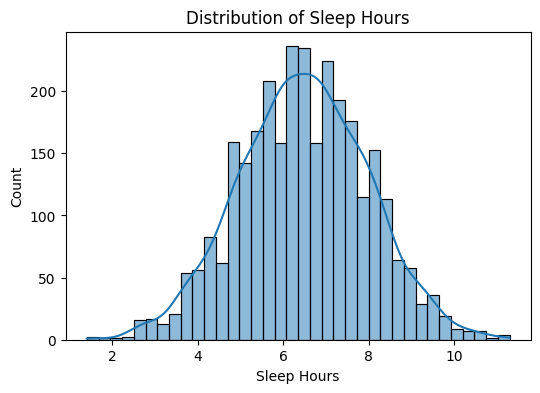

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Sleep Hours",kde=True)
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Count")
plt.show()

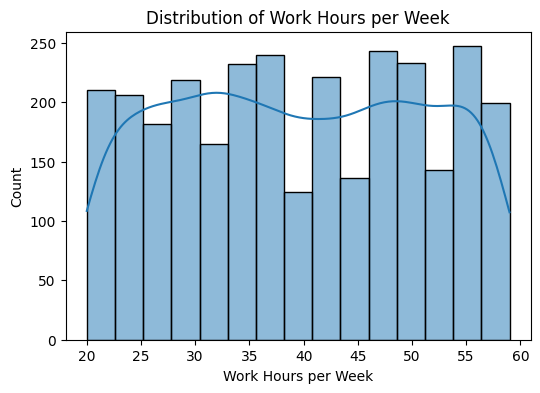

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Work Hours per Week",kde=True)
plt.title("Distribution of Work Hours per Week")
plt.xlabel("Work Hours per Week")
plt.ylabel("Count")
plt.show()



*   The dataset includes people working between ~20 and 60 hours per week

*    The minimum values cluster around 20–25 hours (part-time work).

*    The maximum values cluster around 55–60 hours (extended full-time or overtime work).
*   The distribution is fairly uniform but slightly multimodal.

A significant portion of individuals also work overtime (50+ hours), while a smaller group works part-time hours. The multimodal shape suggests multiple common working patterns within the population.

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Age",kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

NameError: name 'plt' is not defined

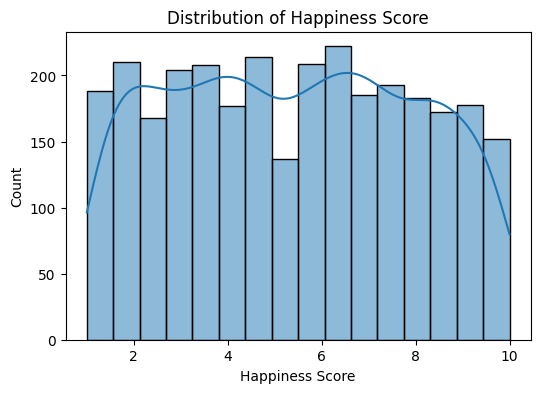

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Happiness Score",kde=True)
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.show()

The happiness scores are spread fairly evenly across the 1–10 range, with slight clustering around mid-to-high values (4–7). Extreme scores (1 and 10) are less common. Overall, the dataset shows a broad range of wellbeing levels without strong skew toward either very low or very high happiness.

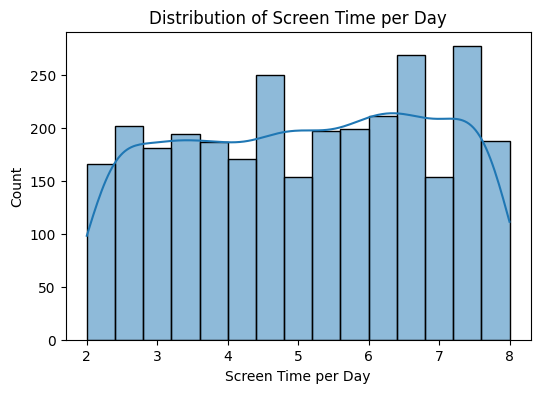

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x="Screen Time per Day (Hours)",kde=True)
plt.title("Distribution of Screen Time per Day")
plt.xlabel("Screen Time per Day")
plt.ylabel("Count")
plt.show()

Most participants spend 3–7 hours on screens daily, with small peaks around 3, 5, and 7 hours. Very low and very high screen time values are rare. The distribution suggests a digitally active population with usage centered around typical work/study patterns

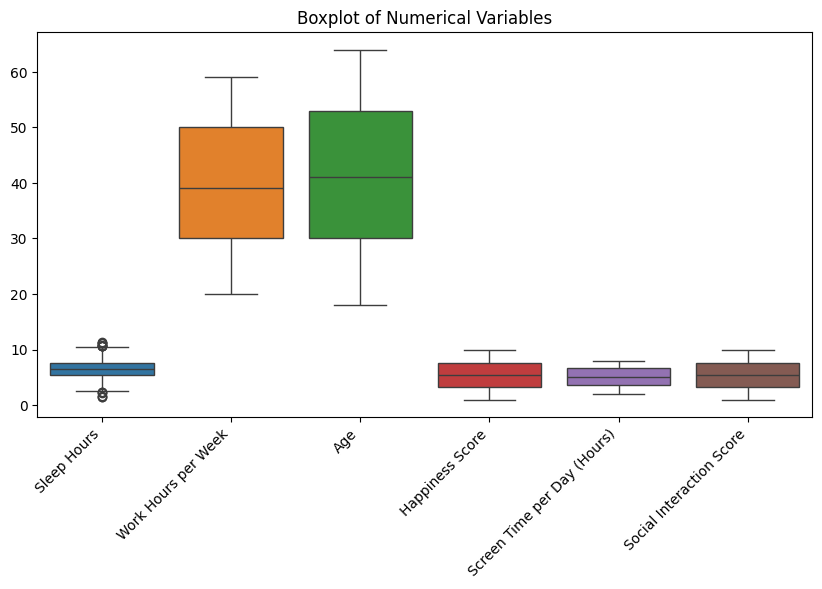

In [ ]:
num_cols = ["Sleep Hours", "Work Hours per Week", "Age", "Happiness Score","Screen Time per Day (Hours)","Social Interaction Score"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)

labels = plt.gca().get_xticklabels()
for label in labels:
    label.set_horizontalalignment("right")
    label.set_x(label.get_position()[0] - 1)  # adjust shift amount
plt.show()


The numerical features in the dataset show varied distributions: Age and Work Hours have wide variability, Sleep Hours is tightly concentrated around 6–8 hours with a few low outliers, and the psychological/social features (Happiness, Screen Time, Social Interaction) have moderate spread with occasional low outliers. Overall, the dataset represents a diverse population with generally stable behavioral patterns.

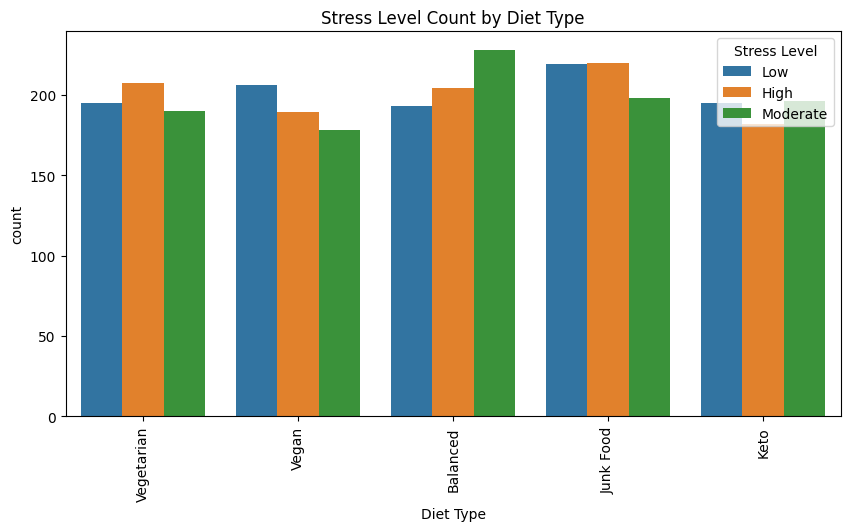

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Diet Type", hue="Stress Level")
plt.title("Stress Level Count by Diet Type")
plt.xticks(rotation=90)
plt.show()



1.   All diet types show very similar stress distributions
2.   Balanced and Junk Food diets show slightly higher “Moderate” stress counts
3.   Vegetarian and Vegan diets show very similar stress profiles
4.   No diet category stands out with extreme stress patterns(There are no sharp spikes or drops)

Stress levels appear evenly distributed across all diet types, with no diet category consistently associated with significantly higher or lower stress. This suggests that diet type may not be a major predictor of stress in this dataset.



---




Checking whether `Exercise Level` and `Stress Level` are imbalanced coloumns for using in heatmap.

In [ ]:
df["Exercise Level"].value_counts()


,count
Exercise Level,
Low,1033
Moderate,998
High,969


In [ ]:
df["Stress Level"].value_counts()


,count
Stress Level,
Low,1008
High,1002
Moderate,990


As we notice there are no significant different between values, so we could use them in heatmap without normalization.

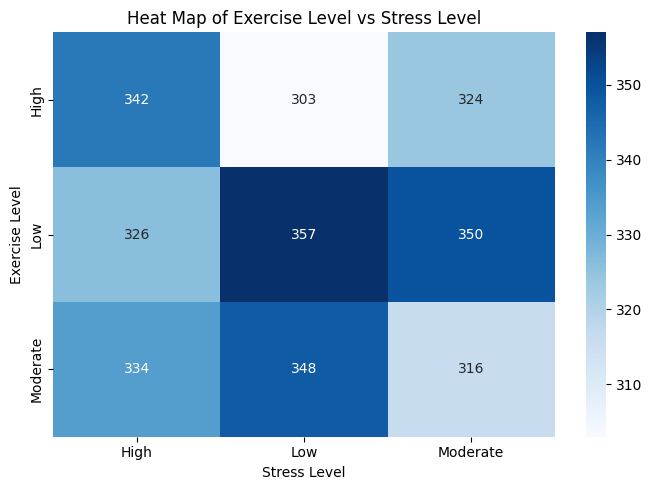

In [ ]:
contingency = pd.crosstab(
    df["Exercise Level"],
    df["Stress Level"]
)

plt.figure(figsize=(7, 5))
sns.heatmap(
    contingency,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Heat Map of Exercise Level vs Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Exercise Level")
plt.tight_layout()
plt.show()


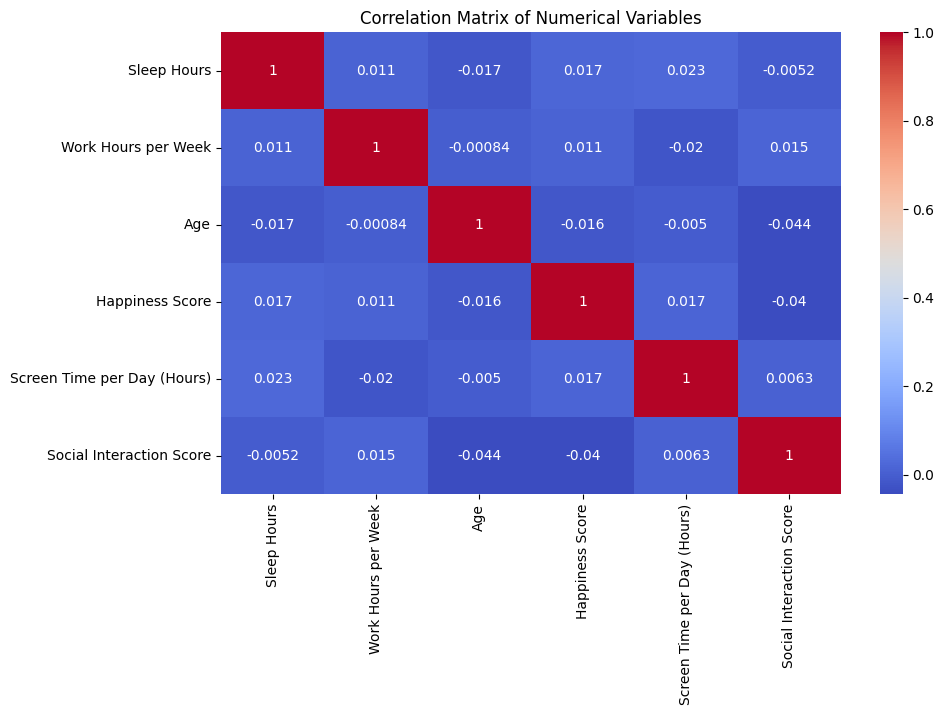

In [ ]:
# Step 1: select numerical columns
num_cols = ["Sleep Hours", "Work Hours per Week", "Age", "Happiness Score","Screen Time per Day (Hours)","Social Interaction Score"]

# Step 2: calculate correlation matrix
correlation_matrix = df[num_cols].corr()

# Step 3: plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

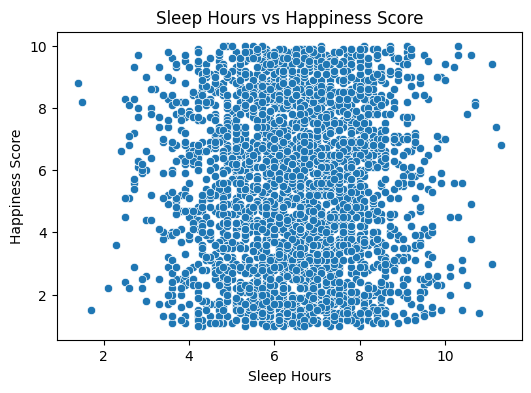

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Sleep Hours", y="Happiness Score")
plt.title("Sleep Hours vs Happiness Score")
plt.show()


# Statistical Hypothesis Testing

For deep dive into the data and get more insights from it lets make hypothesis and test them.

## ANOVA test

Since for ANOVA test it is important that distributions of the groups be roughly normal and variances roughly equal, lets visualize distributions and check variances at first.

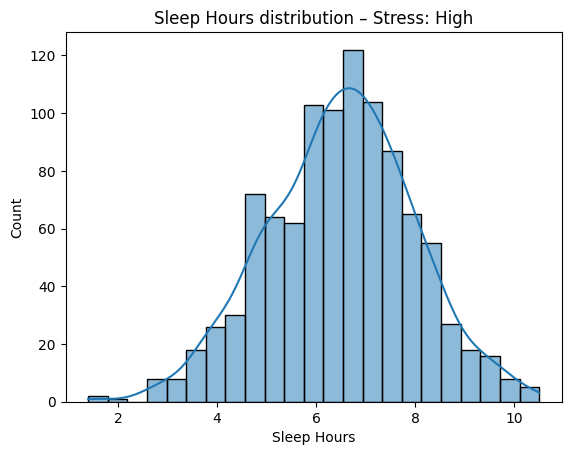

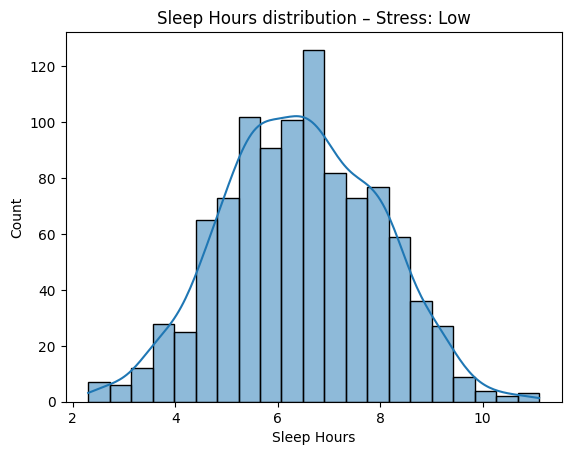

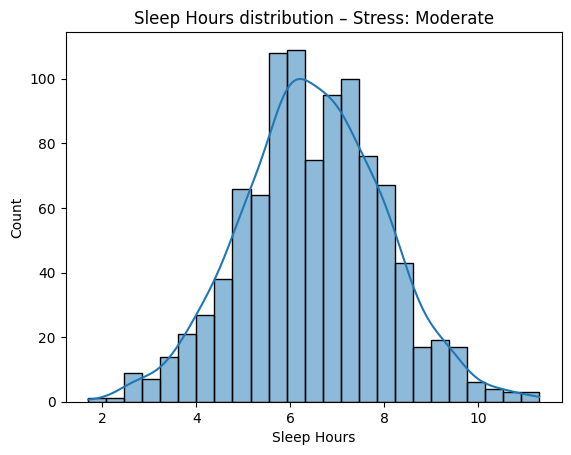

In [ ]:
for level, group in df.groupby('Stress Level'):
    print()
    sns.histplot(group['Sleep Hours'], kde=True)
    plt.title(f"Sleep Hours distribution – Stress: {level}")
    plt.show()

As we notive distributions are roughly normal

In [ ]:
low_sleep = df[df['Stress Level'] == 'Low']['Sleep Hours']
moderate_sleep = df[df['Stress Level'] == 'Moderate']['Sleep Hours']
high_sleep = df[df['Stress Level'] == 'High']['Sleep Hours']

In [ ]:
from scipy.stats import levene

# Levene’s test explicitly checks whether the variances of the groups are equal.
stat, p = levene(low_sleep, moderate_sleep, high_sleep)
print("Levene p-value:", p)
print()
print("p > 0.05  →  variances ARE equal → ANOVA valid")


Levene p-value: 0.4342668607982013

p > 0.05  →  variances ARE equal → ANOVA valid


 ***Do students who sleep less report higher stress?***

$$ H_{0}: \mu_{\text{Low}} = \mu_{\text{Moderate}} = \mu_{\text{High}} $$

$$ H_{1}: \exists\, i,j \ \text{s.t.} \ \mu_i \neq \mu_j $$


In [ ]:
from scipy.stats import f_oneway

f_stat, p = f_oneway(low_sleep, moderate_sleep, high_sleep)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p)

ANOVA F-statistic: 0.2227073853798673
p-value: 0.8003622529558863


$$ p \ge 0.05 \;\Rightarrow\; \text{no statistically significant difference in sleep hours between stress levels}.$$

## T-test

For using T-test we should convert one of the numeric variables into 2 groups and the other variable remains numeric. Then the t-test compares the means of the numeric variable between the 2 groups.


Lets test whether social interaction is somehow connected to happines or not.

We define threshold score value 5 and make two groups deviding based on social
interaction score.

---

<br>

*   Low Interaction Group (< 5)
*   High Interaction Group (≥ 5)

<br>






***Do students with low social interaction report lower happiness?***

&nbsp;&nbsp;&nbsp;&nbsp;$H_{0}: \mu_{\text{Low}} = \mu_{\text{High}}$<br>

&nbsp;&nbsp;&nbsp;&nbsp;$H_{1}: \mu_{\text{Low}} \neq \mu_{\text{High}}$


$\text{Reject}\ \ H_{0} \quad \text{if} \quad p < \alpha$<br>
$\text{Fail to reject } H_{0} \quad \text{if} \quad p \ge \alpha$<br>

$\text{where} \ \ \alpha = 0.05$

Like in ANOVA test, at first, we should check if there is significant difference between group variances.

In [ ]:
df['Social_Group'] = df['Social Interaction Score'].apply(
    lambda x: 'Low' if x < 5 else 'High'
)


In [ ]:
low = df[df['Social_Group'] == 'Low']['Happiness Score']
high = df[df['Social_Group'] == 'High']['Happiness Score']


In [ ]:
#Checking variances
stat, p = levene(low,high)
print("Levene p-value:", p)
print()

Levene p-value: 0.3467896531647825



$$ p \ge 0.05 \;\Rightarrow\; \text{no statistically significant difference in low and high group variance}.$$

In [ ]:
from scipy.stats import ttest_ind

t_stat, p = ttest_ind(low, high, equal_var=True)
print(p)


0.3772342714465292


$$p = 0.377 > 0.05 \quad ⇒  \quad \text{Fail to reject } H_0$$

There is no statistically significant difference in the mean happiness scores between students with low and high social interaction levels

# ML Models Training

* All necessary imports

In [ ]:
# Transformations and Encoding
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## Decision Tree

In [ ]:


# -----------------------------
# Target and features
# -----------------------------
target = "Stress Level"
X = df.drop(columns=[target])
y = df[target]

# -----------------------------
# Column definitions
# -----------------------------
ordinal_cols = ["Exercise Level"]

cat_cols = [
    "Age_Group",
    "Country",
    "Gender",
    "Diet Type",
    "Mental Health Condition"
]

num_cols = [
    "Age",
    "Sleep Hours",
    "Work Hours per Week",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "WorkHours_per_Day",
    "Sleep_Deficit",
    "Sleep_Low"
]


# -----------------------------
# Feature engineering function
# -----------------------------
def feature_engineering_func(X):
    X = X.copy()

    X["WorkHours_per_Day"] = X["Work Hours per Week"] / 7.0
    X["Sleep_Deficit"] = 8.0 - X["Sleep Hours"]
    X["Sleep_Low"] = (X["Sleep Hours"] < 5).astype(int)
    X["Age_Group"] = pd.cut(
        X["Age"],
        bins=[0, 25, 35, 45, 200],
        labels=["<25", "25-35", "35-45", "45+"]
    )

    return X

feature_engineering = FunctionTransformer(
    feature_engineering_func,
    validate=False
)



*   Splitting data into train and test sets



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12, stratify=y
)



*   Preprocessing configuration


In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ("num",
         SimpleImputer(strategy="median"),
         num_cols),

        ("cat",
         Pipeline(steps=[
             ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
             ("onehot", OneHotEncoder(handle_unknown="ignore"))
         ]),
         cat_cols),

        ("ord",
         Pipeline(steps=[
             ("imputer", SimpleImputer(strategy="most_frequent")),
             ("ordinal", OrdinalEncoder(categories=[["Low", "Moderate", "High"]]))
         ]),
         ordinal_cols),
    ]
)





*   Model and final pipeline initialization



In [ ]:


model = DecisionTreeClassifier(
    random_state=12
)

pipe = Pipeline(steps=[
    ("feature_engineering", feature_engineering),
    ("prep", preprocess),
    ("clf", model)
])

**Hyperparameter optimization**



*   Hyperparameters grid



In [ ]:
param_grid = {
    "clf__max_depth": [5, 6, 7, 8, None],
    "clf__min_samples_leaf": [5, 10, 15, 20],
    "clf__min_samples_split": [10, 20, 30, 40],
    "clf__criterion": ["gini", "entropy"],
    "clf__ccp_alpha": [0.0, 0.001, 0.005, 0.01] # post-pruning, increasing ccp_alpha → simpler tree
}




*   Cross-validation strategy



In [ ]:
cv = StratifiedKFold(
    n_splits=6,
    shuffle=True,
    random_state=12
)



*   Grid Search combined with CV



In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="f1_macro",
)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FunctionTransformer(func=<function feature_engineering_func at 0x7a14412928e0>)),
                                       ('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['Age',
                                                                          'Sleep '
                                                                          'Hours',
                                                                          'Work '
                                                                          'Hours '
                                                                          'per '
                                                                          'Week',
                                                                          'Screen '
                                                                          'Time '
                                                                          'per '
                                                                          'Day...
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(categories=[['Low',
                                                                                                                      'Moderate',
                                                                                                                      'High']]))]),
                                                                         ['Exercise '
                                                                          'Level'])])),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=12))]),
             param_grid={'clf__ccp_alpha': [0.0, 0.001, 0.005, 0.01],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [5, 6, 7, 8, None],
                         'clf__min_samples_leaf': [5, 10, 15, 20],
                         'clf__min_samples_split': [10, 20, 30, 40]},
             scoring='f1_macro')



*   Best params



In [ ]:
print("Best hyperparameters:")
print(grid.best_params_)

print("\nBest cross-validation score:")
print(grid.best_score_)


Best hyperparameters:
{'clf__ccp_alpha': 0.0, 'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 10}

Best cross-validation score:
0.34961569193165154




*   Final model



In [ ]:
best_model = grid.best_estimator_



*   Evoluation on test set



In [ ]:
y_pred = best_model.predict(X_test)

print("\nTest set performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Test set performance:
              precision    recall  f1-score   support

        High       0.34      0.43      0.38       301
         Low       0.34      0.33      0.34       302
    Moderate       0.34      0.26      0.30       297

    accuracy                           0.34       900
   macro avg       0.34      0.34      0.34       900
weighted avg       0.34      0.34      0.34       900

Accuracy: 0.34


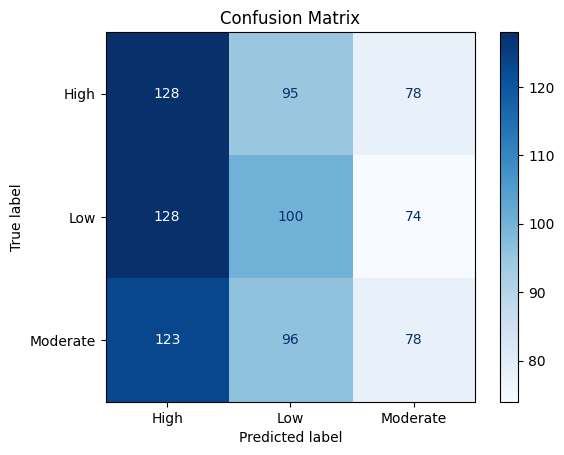

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=best_model.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Random Forest

In [ ]:


# -------------------------
# 1. Target & features
# -------------------------
target = "Stress Level"

X = df.drop(columns=[target]).copy()
y = LabelEncoder().fit_transform(df[target])


*  Featur Engineering

In [ ]:
X["Weekly_Sleep_Hours"] = X["Sleep Hours"] * 7

X["Work_Sleep_Ratio"] = (
    X["Work Hours per Week"] / (X["Weekly_Sleep_Hours"] + 0.1)
)

X["Screen_Social_Ratio"] = (
    X["Screen Time per Day (Hours)"] / (X["Social Interaction Score"] + 0.1)
)

X["Sleep_Bucket"] = pd.cut(
    X["Sleep Hours"],
    bins=[0, 5, 7, 9, 24],
    labels=["Very Low", "Low", "Normal", "High"]
)

X["Work_Bucket"] = pd.cut(
    X["Work Hours per Week"],
    bins=[0, 30, 40, 50, 100],
    labels=["Low", "Medium", "High", "Very High"]
)

X["Age_Group"] = pd.cut(
        X["Age"],
        bins=[0, 25, 35, 45, 200],
        labels=["<25", "25-35", "35-45", "45+"]
)

* Feature groups

In [ ]:
numeric_features = [
    "Sleep Hours",
    "Work Hours per Week",
    "Age",
    "Happiness Score",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Work_Sleep_Ratio",
    "Screen_Social_Ratio"
]

ordinal_features = [
    "Exercise Level",
    "Diet Type",
    "Age_Group"
]

ordinal_categories = [
    ["Low", "Moderate", "High"],          # Exercise Level
    ['Vegetarian', 'Vegan', 'Balanced', 'Junk Food', 'Keto'],    # Diet Type
    ["<25", "25-35", "35-45", "45+"]  # Age_Group
]

nominal_features = [
    "Country",
    "Gender",
    "Mental Health Condition",
    "Sleep_Bucket",
    "Work_Bucket"
]

*  Preprocessing pipelines

In [ ]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

ordinal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(categories=ordinal_categories))
])

nominal_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features),
        ("ord", ordinal_pipeline, ordinal_features),
        ("nom", nominal_pipeline, nominal_features)
    ]
)

* Model, Train / test split

In [ ]:
model = RandomForestClassifier(
    random_state=12
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

param_grid = {
    "classifier__n_estimators": [200, 300, 500],
    "classifier__max_depth": [8, 10, 12, 14, 16],
    "classifier__min_samples_leaf": [5, 10, 20, 40]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

* Train model & Evaluation

Best Accuracy: 0.38333333333333336
              precision    recall  f1-score   support

           0       0.37      0.41      0.39       200
           1       0.38      0.39      0.39       202
           2       0.39      0.35      0.37       198

    accuracy                           0.38       600
   macro avg       0.38      0.38      0.38       600
weighted avg       0.38      0.38      0.38       600



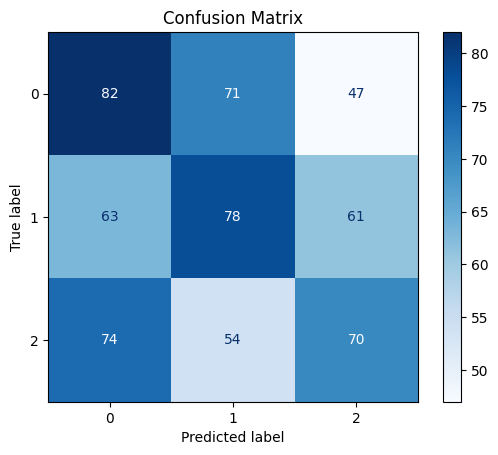

In [ ]:
grid.fit(X_train, y_train)


best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Best Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression




In [ ]:
# =========================
# 1. Define target & features
# =========================

# Target variable: what the model is trying to predict
target = "Stress Level"

# Input features used for prediction
features = [
    "Age",
    "Sleep Hours",
    "Work Hours per Week",
    "Diet Type",
    "Mental Health Condition",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Happiness Score",
    "Country",
    "Gender",
    "Exercise Level"
]

# Numerical features that require scaling
numeric_features = [
    "Age",
    "Sleep Hours",
    "Work Hours per Week",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Happiness Score"
]

# Categorical features that require encoding
categorical_features = [
    "Country",
    "Gender",
    "Exercise Level",
    "Diet Type",
    "Mental Health Condition"
]

* Split X and y

In [ ]:
X = df[features]
y = df[target]

# Stratification ensures equal class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

*  Preprocessing

In [ ]:
# - Numerical features are standardized
# - Categorical features are one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

*  Build Pipeline (Multiclass Logistic Regression)

In [ ]:
# Pipeline ensures that preprocessing and classification
# are applied sequentially and consistently
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,              # allow sufficient iterations for convergence
        solver="lbfgs",             # solver that supports multinomial loss
        multi_class="multinomial"   # true multiclass classification
    ))
])


* Train & Evaluate Model

In [ ]:
# Fit the entire pipeline on training data
model_pipeline.fit(X_train, y_train)

# Predict stress levels on unseen test data
y_pred = model_pipeline.predict(X_test)

# Overall accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Detailed classification metrics for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix to analyze misclassification patterns
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.31

Classification Report:
              precision    recall  f1-score   support

        High       0.31      0.30      0.31       200
         Low       0.30      0.27      0.28       202
    Moderate       0.32      0.37      0.34       198

    accuracy                           0.31       600
   macro avg       0.31      0.31      0.31       600
weighted avg       0.31      0.31      0.31       600

Confusion Matrix:
[[60 66 74]
 [67 54 81]
 [65 60 73]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The Logistic Regression model achieved a test accuracy of approximately 31%, which is close to random guessing for a three-class problem.

Precision, recall, and F1-scores are low across all stress levels, indicating difficulty in distinguishing between Low, Moderate, and High classes. The confusion matrix shows frequent misclassification between adjacent stress categories, suggesting strong class overlap in the feature space.

Overall, these results indicate that linear decision boundaries are insufficient for this task, making Logistic Regression a weak but informative baseline and motivating the use of non-linear models in subsequent experiments.


**Optimization of results by hyperparameters**



In [ ]:
# We tune the regularization strength C of Logistic Regression
# Small C -> stronger regularization (simpler model)
# Large C -> weaker regularization (more flexible model)
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100]
}


# GridSearchCV will:
# - Try each C value
# - Perform 5-fold cross-validation on the training set
# - Select the configuration with the best average macro F1-score
grid = GridSearchCV(
    estimator=model_pipeline,   # full pipeline (preprocessing + classifier)
    param_grid=param_grid,      # hyperparameters to test
    cv=5,                       # 5-fold cross-validation
    scoring="f1_macro",         # metric used for model selection
    n_jobs=-1                   # use all CPU cores for faster execution
)



# The model is trained multiple times internally
# Only training data is used during cross-validation
grid.fit(X_train, y_train)


# =========================
# 4. Display best configuration
# =========================

# Best hyperparameter setting found by cross-validation
print("Best params:", grid.best_params_)

# Best average macro F1-score across validation folds
print("Best CV f1_macro:", grid.best_score_)


# =========================
# 5. Evaluate best model on test set
# =========================

# Retrieve the best model (refit on full training set)
best_model = grid.best_estimator_

# Make predictions on unseen test data
y_pred = best_model.predict(X_test)

# Final evaluation on the test set
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best params: {'classifier__C': 0.01}
Best CV f1_macro: 0.3272489523318978
Test Accuracy: 0.32
              precision    recall  f1-score   support

        High       0.31      0.30      0.31       200
         Low       0.33      0.28      0.30       202
    Moderate       0.31      0.37      0.34       198

    accuracy                           0.32       600
   macro avg       0.32      0.32      0.32       600
weighted avg       0.32      0.32      0.32       600

[[61 58 81]
 [64 56 82]
 [71 54 73]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Grid search showed that a small value of C (0.01) works best, meaning the model performs better when it is kept simple. Even with this tuning, the model’s performance is still close to random guessing for three classes.

Accuracy and F1-scores improve only slightly compared to the original Logistic Regression model. The confusion matrix shows that the model often mixes up the different stress levels. This means that the main problem is not the parameter choice, but the fact that Logistic Regression is a linear model. To get better results, more flexible non-linear models are needed.

## KNN


* Features and Target definition



In [ ]:
target = "Stress Level"
features = [
    "Age",
    "Sleep Hours",
    "Work Hours per Week",
    "Diet Type",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Country",
    "Gender",
    "Exercise Level"
]

X = df[features]
y = df[target]

* Training and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

process = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

knn_pipeline = Pipeline(steps=[
    ("preprocess", process),
    ("knn", KNeighborsClassifier(
        n_neighbors=5,      # K
        metric="euclidean"  # Euclidean distance
    ))
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

print("Classification Report:", classification_report(y_test,y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.33

Classification Report:               precision    recall  f1-score   support

        High       0.34      0.49      0.41       200
         Low       0.32      0.29      0.30       202
    Moderate       0.30      0.20      0.24       198

    accuracy                           0.33       600
   macro avg       0.32      0.33      0.32       600
weighted avg       0.32      0.33      0.32       600

Confusion Matrix:
[[99 59 42]
 [92 58 52]
 [96 62 40]]


* Grid Search


In [ ]:
param_grid = {
    "knn__n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
}
grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("Best params:", grid.best_params_)
print("Best CV f1_macro:", grid.best_score_)

Best params: {'knn__n_neighbors': 5}
Best CV f1_macro: 0.335


# Summary

Across all four machine-learning models applied to our dataset, performance remained consistently low and hovered close to random chance. This suggests that the current feature set does not provide strong predictive signals for Stress Level, and the relationship between our input variables and the target is likely non-linear and complex


From this outcome, we learned that improving prediction will require richer or more discriminative features, deeper feature engineering, and potentially more expressive non-linear models. The experiment also highlights an important insight in applied ML: model performance is fundamentally constrained by data quality and feature relevance—not only by algorithm choice.